# Chapter 4. k-Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier as KNN

## Standard kNN Classifier

In [2]:
arrays = np.load('data/iris_train_scaled.npz')
X_train = arrays['X']
y_train = arrays['y']
arrays = np.load('data/iris_test_scaled.npz')
X_test = arrays['X']
y_test = arrays['y']

print('X shape = {}'.format(X_train.shape) \
      + '\ny shape = {}'.format(y_train.shape))

X shape = (120, 4)
y shape = (120,)


In [3]:
X_train = X_train[:,[0,1]]
X_test = X_test[:,[0,1]]
X_train.shape

(120, 2)

The accuracy for K=1 on the training data is 0.933
The accuracy for K=1 on the test data is 0.667
The accuracy for K=3 on the training data is 0.833
The accuracy for K=3 on the test data is 0.767
The accuracy for K=9 on the training data is 0.858
The accuracy for K=9 on the test data is 0.800
The accuracy for K=36 on the training data is 0.775
The accuracy for K=36 on the test data is 0.800


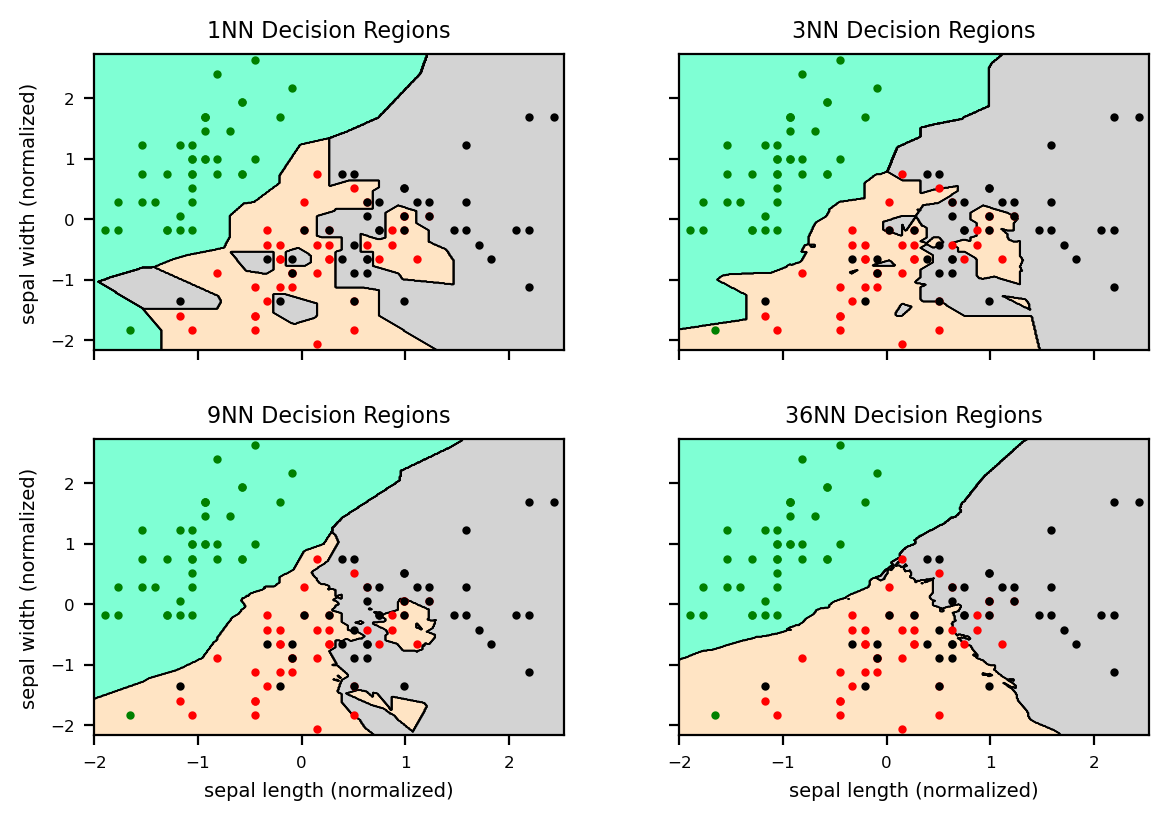

In [4]:
color = ['aquamarine', 'bisque', 'lightgrey']
cmap = ListedColormap(color)

mins = X_train.min(axis=0) - 0.1
maxs = X_train.max(axis=0) + 0.1
x = np.arange(mins[0], maxs[0], 0.01)
y = np.arange(mins[1], maxs[1], 0.01)
X, Y = np.meshgrid(x, y)
coordinates = np.array([X.ravel(), Y.ravel()]).T

fig, axs = plt.subplots(2, 2, figsize=(6, 4), dpi = 200)
fig.tight_layout()
K_val = [1, 3, 9, 36]
for ax, K in zip(axs.ravel(), K_val):
    knn = KNN(n_neighbors=K, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train)
    Z = knn.predict(coordinates)
    Z = Z.reshape(X.shape)
    ax.tick_params(axis='both', labelsize=6)
    ax.set_title(str(K) + 'NN Decision Regions', fontsize=8)
    ax.pcolormesh(X, Y, Z, cmap = cmap, shading='nearest')
    ax.contour(X ,Y, Z, colors='black', linewidths=0.5)
    ax.plot(X_train[y_train==0, 0], X_train[y_train==0, 1],'g.', markersize=4)
    ax.plot(X_train[y_train==1, 0], X_train[y_train==1, 1],'r.', markersize=4)
    ax.plot(X_train[y_train==2, 0], X_train[y_train==2, 1],'k.', markersize=4)
    ax.set_xlabel('sepal length (normalized)', fontsize=7)
    ax.set_ylabel('sepal width (normalized)', fontsize=7)

    print('The accuracy for K={} on the training data is {:.3f}'\
          .format(K, knn.score(X_train, y_train)))
    print('The accuracy for K={} on the test data is {:.3f}'\
          .format(K, knn.score(X_test, y_test)))
    
for ax in axs.ravel():
    # show the x-label and the y-label for the last row and the left column, respectively
    ax.label_outer() 

## A Regression Application Using kNN

In [5]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor as KNN

california = datasets.fetch_california_housing()
print('california housing data shape: '+ str(california.data.shape) + \
      '\nfeature names: ' + str(california.feature_names) + \
        '\ntarget name: ' + str(california.target_names))

california housing data shape: (20640, 8)
feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target name: ['MedHouseVal']


### Data preview

In [6]:
print(california.DESCR[:975])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).



In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(california.data, 
                                                   california.target, 
                                                   random_state=100)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' \
      + str(X_test.shape) + '\ny_train_shape: ' + str(y_train.shape)\
            + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (15480, 8)
X_test_shape: (5160, 8)
y_train_shape: (15480,)
y_test_shape: (5160,)


In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Exploratary analysis

In [9]:
# np.concatenate((a1, a2)) concatenate arrays 
# a1 and a2 along the specified axis
california_arr = np.concatenate((X_train_scaled, y_train.reshape(-1,1)), 
                                axis=1) 
california_pd = pd.DataFrame(california_arr, 
                             columns=[*california.feature_names, 'MEDV'])
california_pd.head().round(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,1.604,-0.843,0.974,-0.086,0.068,0.027,-0.865,0.883,2.903
1,-0.921,0.345,-0.197,-0.238,-0.472,-0.068,1.647,-0.999,0.687
2,-0.809,1.849,-0.376,-0.037,-0.516,-0.082,1.675,-0.741,1.097
3,0.597,-0.289,-0.437,-0.119,-0.680,-0.121,1.008,-1.423,4.600
4,0.219,0.107,0.187,0.122,-0.436,-0.057,0.956,-1.283,2.134


<Axes: >

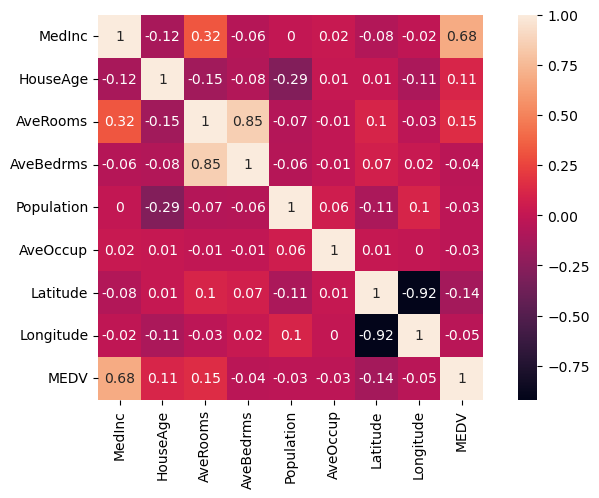

In [10]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(california_pd.corr().round(2), annot=True, square=True, ax=ax)


In [11]:
# X_trained with selected features
X_train_fs_scaled = X_train_scaled[:,[0, 1, 2, 7]] 
X_test_fs_scaled = X_test_scaled[:,[0, 1, 2, 7]]
print('The shape of training X after feature selection: '\
      + str(X_train_fs_scaled.shape))
print('The shape of test X after feature selection: '\
      + str(X_test_fs_scaled.shape))

The shape of training X after feature selection: (15480, 4)
The shape of test X after feature selection: (5160, 4)


In [12]:
# save for possible uses later
np.savez('data/california_train_fs_scaled',
         X = X_train_fs_scaled, y = y_train) 
np.savez('data/california_test_fs_scaled', 
         X = X_test_fs_scaled, y = y_test)

### Model training and evaluation

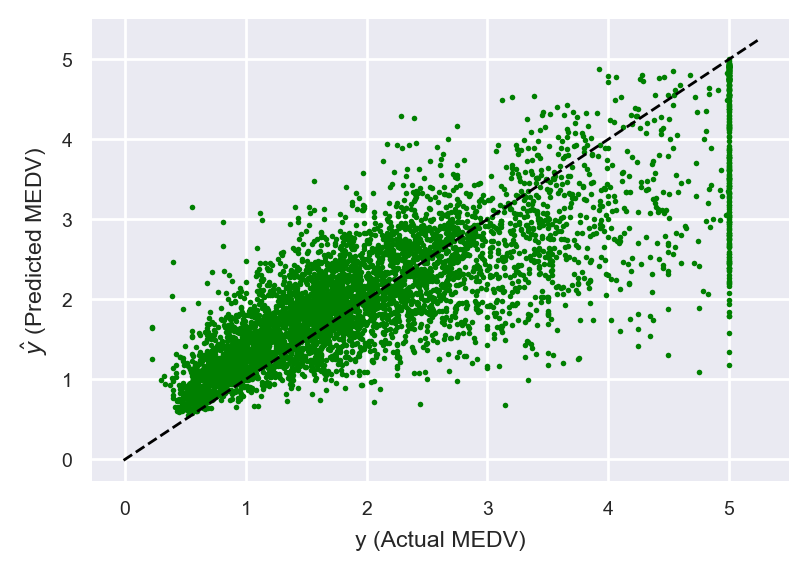

In [38]:
plt.style.use('seaborn-v0_8')
knn = KNN(n_neighbors=50, weights='uniform', metric='euclidean')
knn.fit(X_train_fs_scaled, y_train)
y_test_predictions = knn.predict(X_test_fs_scaled)

plt.figure(figsize=(4.5, 3), dpi = 200)
plt.plot(y_test, y_test_predictions, 'g.', markersize=4) 
lim_left, lim_right = plt.xlim()
plt.plot([lim_left, lim_right], [lim_left, lim_right], '--k', linewidth=1)
plt.xlabel("y (Actual MEDV)", fontsize='small')
plt.ylabel("$\hat{y}$ (Predicted MEDV)", fontsize='small')
plt.tick_params(axis='both', labelsize=7)

In [39]:
print('The test R^2 is: {:.2f}'\
      .format(knn.score(X_test_fs_scaled, y_test)))

The test R^2 is: 0.64


### Train a full model with all features

In [41]:
knn = KNN(n_neighbors=5, weights='uniform', metric='euclidean')
knn.fit(X_train_scaled, y_train)
print('The test R^2 is: {:.2f}'.format(knn.score(X_test_scaled, y_test)))

The test R^2 is: 0.69


In [51]:
# train regressors for different values of k
from sklearn.neighbors import KNeighborsRegressor as KNN

results = []
for k in 2 * np.arange(1, 51):
    knn = KNN(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    results.append({
        'k': k,
        'train R^2': round(knn.score(X_train_scaled, y_train), 4),
        'test R^2': round(knn.score(X_test_scaled, y_test), 4)
    })

# convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)


      k  train R^2  test R^2
0     2     0.8778    0.6327
1     4     0.8090    0.6847
2     6     0.7783    0.6962
3     8     0.7607    0.7009
4    10     0.7476    0.7047
5    12     0.7390    0.7052
6    14     0.7320    0.7045
7    16     0.7257    0.7045
8    18     0.7206    0.7028
9    20     0.7163    0.7006
10   22     0.7128    0.6991
11   24     0.7088    0.6977
12   26     0.7059    0.6960
13   28     0.7028    0.6942
14   30     0.6997    0.6920
15   32     0.6972    0.6921
16   34     0.6953    0.6903
17   36     0.6930    0.6886
18   38     0.6916    0.6871
19   40     0.6898    0.6867
20   42     0.6881    0.6856
21   44     0.6865    0.6846
22   46     0.6849    0.6838
23   48     0.6835    0.6830
24   50     0.6820    0.6821
25   52     0.6807    0.6816
26   54     0.6792    0.6805
27   56     0.6782    0.6798
28   58     0.6771    0.6787
29   60     0.6760    0.6775
30   62     0.6748    0.6762
31   64     0.6737    0.6750
32   66     0.6726    0.6747
33   68     0.

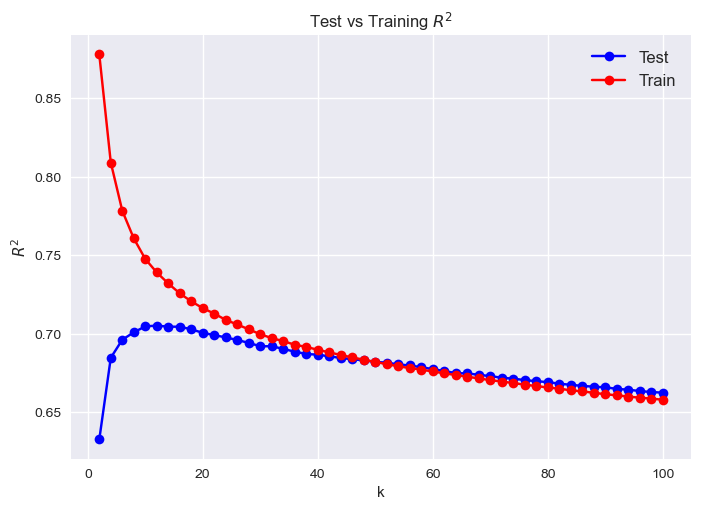

In [52]:
plt.plot(results.k, results['test R^2'], 'bo-', label='Test')
plt.plot(results.k, results['train R^2'], 'ro-', label='Train')
plt.xlabel('k')
plt.ylabel('$R^2$')
plt.title('Test vs Training $R^2$')
plt.legend(fontsize='large')


In [66]:
print('The highest test R^2 among fitted kNN models is: {:.4f}'\
      .format(results['test R^2'].max()))

print('The corresponding k is: {}'.format(results['k'][results['test R^2'].idxmax()]))

The highest test R^2 among fitted kNN models is: 0.7052
The corresponding k is: 12


### Train a linear model using all features

In [59]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
print('The test R^2 of the fitted linear model is: {:.4f}'\
      .format(r2_score(y_test, lm.predict(X_test_scaled))))

# or use lm.score(X_test_scaled, y_test)

The test R^2 of the fitted linear model is: 0.6205


1) Training Set: the training set is used to train the machine learning model. It consists of a labeled dataset where the model learns the patterns and relationships between input features and their corresponding output labels.
 
2) Validation Set: the validation set is employed to fine-tune the model's hyperparameters and assess its performance during training.

3) Test Set: the test set serves as an independent dataset to evaluate the final performance of the trained model.

# End